# Multiple Linear Regression

## Assumptions of the model
It's essential to understand the assumptions of the model before we start building and coding. Each assumption if violated means we may have to take extra steps to improve our model or in some cases dump the model altogether. Here is a list of the assumptions of the model:
- A linear relationship is assumed between the dependent variable and the independent variables.
- Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
- Regression residuals must be normally distributed.
- The residuals are homoscedastic and approximately rectangular-shaped.
- No Autocorrelation of the residuals.

# 1. Import libraries

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

%matplotlib inline

# 2. loading data

In [478]:
# loading the data
economy_df = pd.read_csv('korea_data.csv')

# replace the missing value '..' with 'nan'
economy_df = economy_df.replace('..', 'nan')

# set the index to the year column
economy_df.set_index('Year', inplace=True)

# changing the data type
economy_df = economy_df.astype(float)
economy_df.dtypes

Unnamed: 0                                                               float64
Unnamed: 0.1                                                             float64
GDP growth (annual %)                                                    float64
Gross capital formation (% of GDP)                                       float64
Population growth (annual %)                                             float64
Birth rate, crude (per 1,000 people)                                     float64
Broad money growth (annual %)                                            float64
Final consumption expenditure (annual % growth)                          float64
General government final consumption expenditure (annual % growth)       float64
Gross capital formation (annual % growth)                                float64
Households and NPISHs Final consumption expenditure (annual % growth)    float64
Unemployment, total (% of total labor force) (national estimate)         float64
dtype: object

In [407]:
# changing the columns name

column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

economy_df.rename(columns=column_names, inplace=True)

economy_df.head(2)

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51


In [487]:
# check id ther is any null value
economy_df.isna().any()

Unnamed: 0                                                               False
Unnamed: 0.1                                                             False
GDP growth (annual %)                                                    False
Gross capital formation (% of GDP)                                       False
Population growth (annual %)                                             False
Birth rate, crude (per 1,000 people)                                      True
Broad money growth (annual %)                                            False
Final consumption expenditure (annual % growth)                          False
General government final consumption expenditure (annual % growth)       False
Gross capital formation (annual % growth)                                False
Households and NPISHs Final consumption expenditure (annual % growth)    False
Unemployment, total (% of total labor force) (national estimate)         False
dtype: bool

In [409]:
# dropping the 'NaN' row
economy_df.dropna(axis=0, inplace=True)
economy_df.tail()

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
2012,2.292398,31.001229,0.525714,9.6,4.806465,2.246066,3.374311,-2.299833,1.923148,3.2
2013,2.896205,29.102217,0.455219,8.6,4.638891,2.191130,3.261377,-0.118665,1.882099,3.1
2014,3.341448,29.276910,0.628150,8.6,8.144493,2.042800,3.046199,5.262495,1.747117,3.5
2015,2.790236,28.918112,0.527288,8.6,8.190748,2.385188,2.988499,7.297390,2.203974,3.6
2016,2.929305,29.252387,0.451318,7.9,7.123156,2.981150,4.477185,5.610214,2.525765,3.7


# 3. Check for Perfect Multicollinearity

In [410]:
# checking for colinearity among variabel
correlation = economy_df.corr()
correlation

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consum_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_cap_form_growth,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployment,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


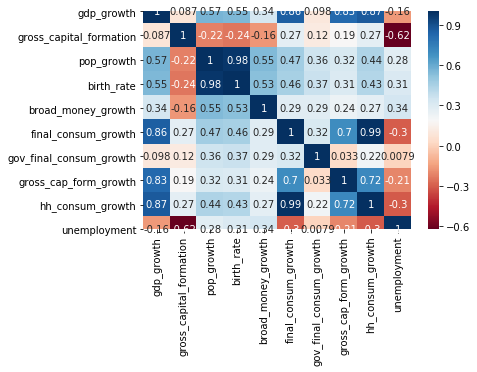

In [493]:
# plot a heat map to better visualize the correlation
sns.heatmap(correlation, annot=True, xticklabels = correlation.columns, yticklabels = correlation.columns, cmap = 'RdBu')

### Remove multicollinearity systematically

A general recommendation is that if any of our variables come back with a value of 5 or higher, then they should be removed from the model.

In [461]:
economy_df_before = economy_df
economy_df_after = economy_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)


x1 = sm.tools.add_constant(economy_df_before)

x2 = sm.tools.add_constant(economy_df_after)

series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index = x1.columns)
series_after = pd.Series([variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])], index = x2.columns)


print('Data before')
print('-'*100)
print(series_before)
print('-'*100)
print('Data After')
print('-'*100)
print(series_after)

Data before
----------------------------------------------------------------------------------------------------
const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64
----------------------------------------------------------------------------------------------------
Data After
----------------------------------------------------------------------------------------------------
const                      29.930686
gdp_growth                  9.366468
pop_growth                  2.636300
broad_money_growth          1.604662
gov_final_consum_growth     1.361763
gross_cap_form_growth       3.553567
hh_consu

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### alternate way to check multicollinearity

Inside of pandas, there is a scatter_matrix chart that will create a scatter plot for each variable in our dataset against another variable. This is a great tool for visualizing the correlation of one variable across all the other variables in the dataset. I'll take my econ_df_after and pass it through the scatter_matrix method. What you're looking for is a more random distribution, there shouldn't be any strong trends in the scatter matrix as this would be identifying correlated variables. Now, for our explanatory variable, we want to see trends!

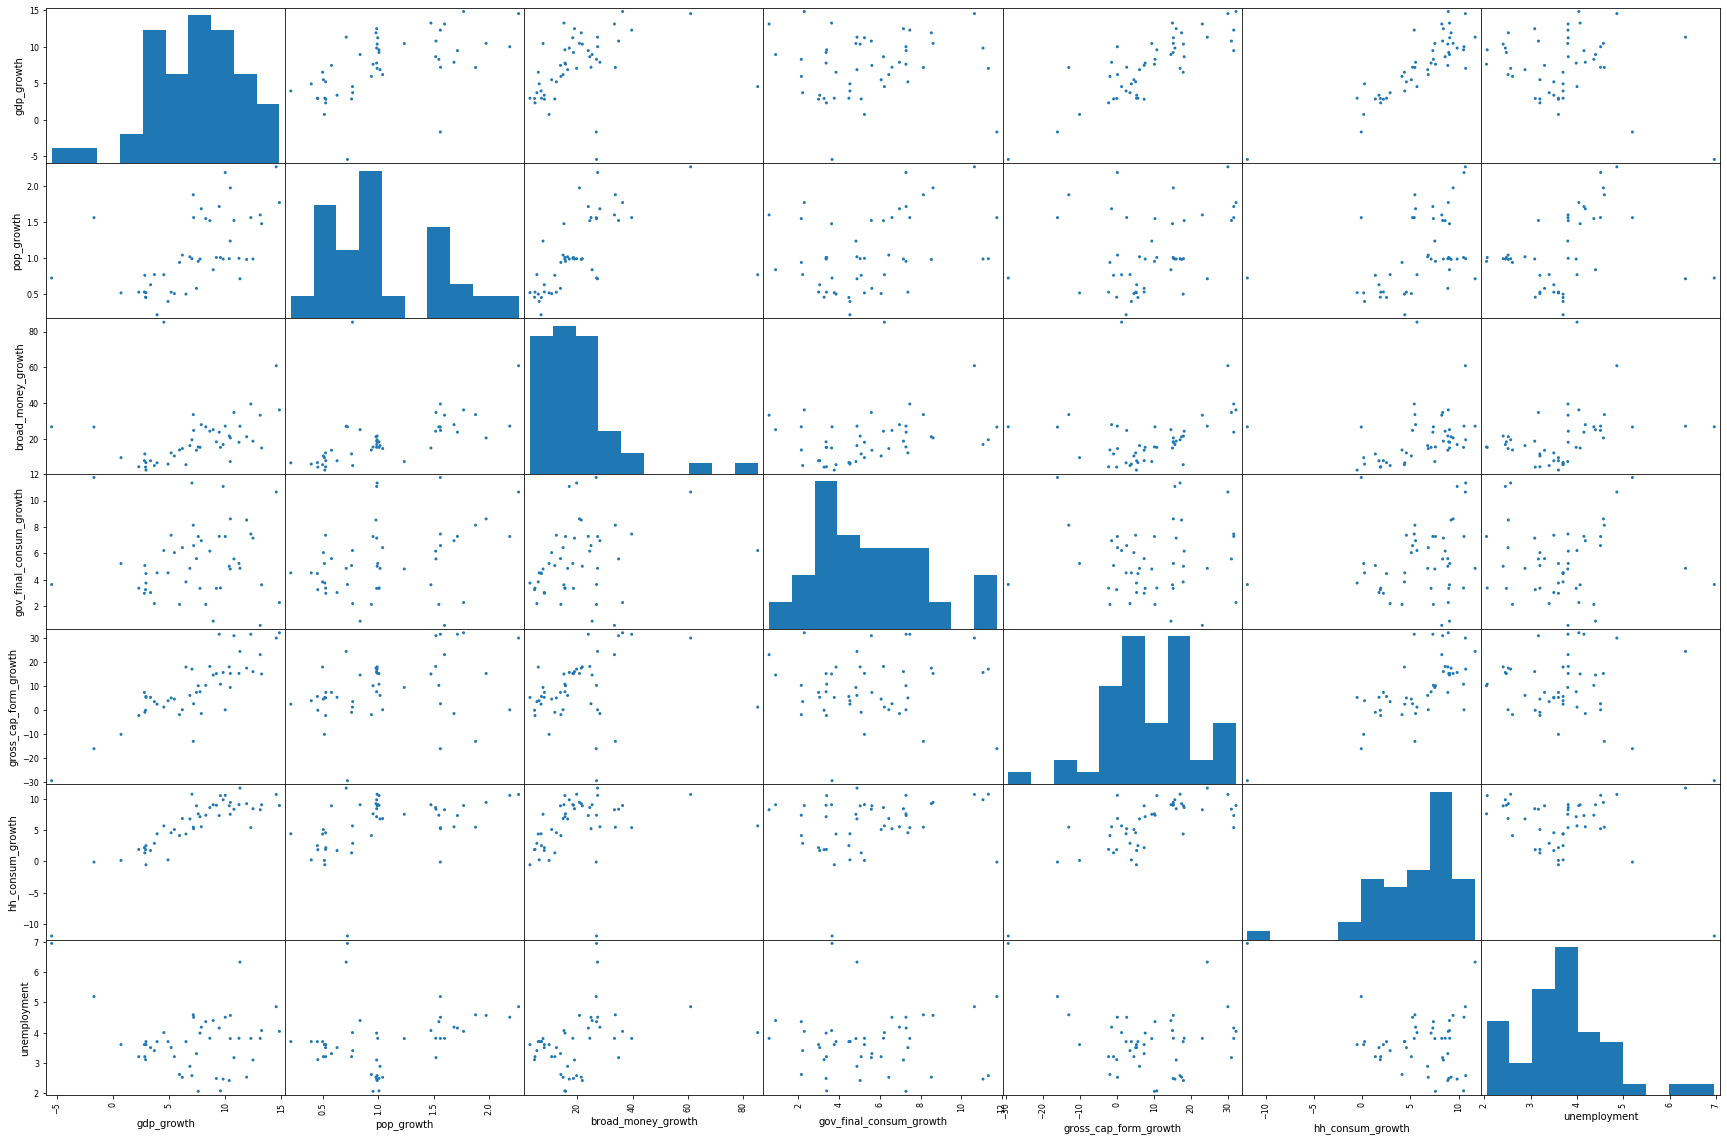

In [492]:
pd.plotting.scatter_matrix(economy_df_after, alpha=1 , figsize=(30, 20))

# showing the plot
plt.show()

# 4. Describe the Data Set

In [338]:
# get dataset summary
summary = economy_df.describe()

# add standard deviation metrix
summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

# displaying summary
summary

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


### Filtering the Dataset
Imagine if we wanted to remove the values that have an amount exceeding three standard deviations. How would we approach this? Well, if we leverage the numpy module and the scipy module we can filter out the rows using the stats.zscore function. The Z-score is the number of standard deviations from the mean a data point is, so if it's less than 3 we keep it otherwise we drop it. From here, I also provided a way to let us know what rows were removed by using the index.difference the function which will show the difference between the two datasets.

In [474]:
# filter the outliers
economy_remove_df = economy_df[np.abs(stats.zscore(economy_df) < 3).all(axis=1)]

# print the removed rows
economy_df.index.difference(economy_remove_df.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

# 5. Build the Model

In [386]:
# define input variable and output variable
y = economy_df_after[['gdp_growth']]
x = economy_df_after.drop('gdp_growth', axis=1)

# split dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=1)

# create instance of our model
multi_regression_model = LinearRegression()

# fitting the data into the model
multi_regression_model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Exploring the Output

In [387]:
# check the intercept and coefficient
intercept = multi_regression_model.intercept_[0]
coefficient = multi_regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

print("The coefficient for our model is {:.4}".format(coefficient))
print('-'*100)

# loop through the dictionary and print the data
for coefficient in zip(x.columns, multi_regression_model.coef_[0]):
    print('The coefficient for {} is {:.2}'.format(coefficient[0], coefficient[1]))

The intercept for our model is 2.08
----------------------------------------------------------------------------------------------------
The coefficient for our model is 1.99
----------------------------------------------------------------------------------------------------
The coefficient for pop_growth is 2.0
The coefficient for broad_money_growth is -0.0017
The coefficient for gov_final_consum_growth is -0.21
The coefficient for gross_cap_form_growth is 0.14
The coefficient for hh_consum_growth is 0.51
The coefficient for unemployment is 0.027


In [389]:
# get multiple predictions

y_predict = multi_regression_model.predict(x_test)

# show first five predicted row
y_predict[:5]

array([[ 7.61317534],
       [ 6.31344066],
       [ 5.06818662],
       [ 4.19869856],
       [11.11885324]])

# 6. Evaluating the Model

### Evaluate using status model
To make diagnosing the model easier, we will be using the statsmodel module. This module has built-in functions that will make calculating metrics quick. However, we will need "rebuild" our model using the statsmodel module. We do this by creating a constant variable, call the OLS() method and then the fit() method. We now have a new model, and the first thing we need to do is to make sure that the assumptions of our model hold. This means checking the following:

- Regression residuals must be normally distributed.
- The residuals are homoscedastic
- Absence of multicollinearity (we did this above).
- No Autocorrelation.

In [388]:
# define our input 
x2 = sm.add_constant(x)

# creatinga an OLS model 
model = sm.OLS(y, x2)

# fitting the data to the model 
estimate = model.fit()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Checking for Heteroscedasticity
what does it mean?

the variation of the error in the residual is not constant. 
***
### What is the problem with heteroscedasticity?
-  it causes the coefficient estimates to be less precise.
- Heteroscedasticity tends to produce p-values that are smaller than they should be.
***
### How to test for heteroscedasticity?
To check for heteroscedasticity, we can leverage the statsmodels.stats.diagnostic module. This module will give us to a few test functions we can run, the Breusch-Pagan and the White test for heteroscedasticity. The Breusch-Pagan is a more general test for heteroscedasticity while the White test is a unique case.

- The null hypothesis for both the White’s test and the Breusch-Pagan test is that the variances for the errors are equal:
    - H0 = σ2i = σ2
- The alternate hypothesis (the one you’re testing), is that the variances are not equal:
    - H1 = σ2i ≠ σ2

In [390]:
# run the white test
_, pval, __, f_pval = diag.het_white(estimate.resid, estimate.model.exog, retres = False)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")
    
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(estimate.resid, estimate.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

0.43365711028667386 0.509081191858663
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.4337
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 

0.25183646701201695 0.2662794557854012
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.2518
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


### checking for autocorellation
This is basically the same as saying that we need our observations (or individual data points) to be independent from one another (or uncorrelated) i.e. error at ∈t must not indicate the at error at ∈t+1. Presence of correlation in error terms is known as **Autocorrelation**.
***
### What is the problem with autocorrelation?
- The existence of autocorrelation means that computed standard errors, and consequently p-values, are misleading.
- Autocorrelation in the residuals of a model is also a sign that the model may be unsound.
***
### How to test for autocorrelation?
Again, we will go to our favorite module the statsmodels.stats.diagnostic module, and use the Ljung-Box test for no autocorrelation of residuals. Here:

- H0: The data are random.
- Ha: The data are not random.

In [391]:
# calculating the lag
lag = min(10, (len(x)//5))
print('The number of lag will be {}'.format(lag))
print('-'*100)

# calculating ljung-box test
test_result = diag.acorr_ljungbox(estimate.resid, lags=lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_result

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

The number of lag will be 9
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.1596
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


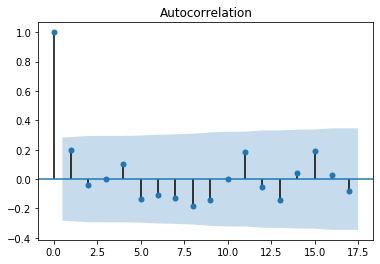

In [392]:
# plot autocorellation
sm.graphics.tsa.plot_acf(estimate.resid)
plt.show()

### Checking For Normally Distributed Residuals
This one is easy to check for; we will do it visually.

Visually what we are looking for is the data hugs the line tightly; this would give us confidence in our assumption that the residuals are normally distributed. Now, it is highly unlikely that the data will perfectly hug the line, so this is where we have to be subjective.

### Checking the Mean of the Residuals Equals 0¶
Additionally, we need to check another assumption, that the mean of the residuals is equal to zero. If the mean is very close to zero, then we are good to proceed. Just a side note, it's not uncommon to get a mean that isn't exactly zero; this is because of rounding errors.

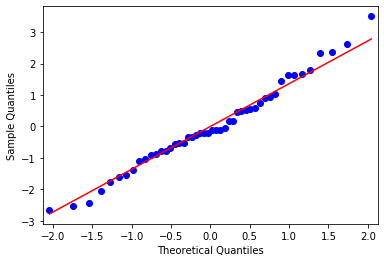

Mean of the residuals: 1.027881483632124e-14


In [480]:
# check wheather residuals is normally distributed
sm.qqplot(estimate.resid, line='s')
plt.show()
# point should be very close to the line, then we can say that the residual is normally distributed

# check the mean of the residual is approx zero
mean_resid = sum(estimate.resid) / len(estimate.resid)
print('Mean of the residuals:', mean_resid)

### Measures of Error/ Regresson Evaluation of Metrics
- MSE
- MAE
- RMSE

In [394]:
# Calculate mean square error
model_mse = mean_squared_error(y_test, y_predict)

# calculate mean absoule error
model_mae = mean_absolute_error(y_test, y_predict)

# calculate root mean absoule error
model_rmse = math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.707
MAE 0.611
RMSE 0.841


### R-Squared

In [395]:
model_rsquare = r2_score(y_test, y_predict)
model_rsquare

0.8644231847567635

### Confidence Intervals 

In [482]:
# checking for confident interval
estimate.conf_int()

,0,1
const,0.767366,3.078409
pop_growth,1.207542,3.133351
gov_final_consum_growth,-0.365126,-0.012655
gross_cap_form_growth,0.080511,0.178049
hh_consum_growth,0.343825,0.651380


interpreting with the output above, we will say with 95% confident that the 
coefficient for "gross_capital_formation" will be between "-0.245765" and "0.082536" and same as for other index


# Hypothesis Testing
With hypothesis testing, we are trying to determine the statistical significance of the coefficient estimates. This test is outlined as the following.

- **Null Hypothesis**: There is no relationship between the exploratory variables and the explanatory variable.
- **Alternative Hypothesis**: There is a relationship between the exploratory variables and the explanatory variable.
***
- If we reject the null, we are saying there is a relationship, and the coefficients do not equal 0.
- If we fail to reject the null, we are saying there is no relationship, and the coefficients do equal 0

In [403]:
estimate.pvalues

const                      9.088069e-02
pop_growth                 5.996378e-04
broad_money_growth         9.830934e-01
gov_final_consum_growth    4.419934e-02
gross_cap_form_growth      5.978663e-06
hh_consum_growth           6.801951e-07
unemployment               9.835355e-01
dtype: float64

### Create a Summary of the Model Output

In [402]:
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     57.17
Date:                Sat, 02 May 2020   Prob (F-statistic):           2.36e-18
Time:                        16:44:36   Log-Likelihood:                -82.903
No. Observations:                  48   AIC:                             179.8
Df Residuals:                      41   BIC:                             192.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

The first thing we notice is that the p-values from up above are now easier to read and we can now determine that the coefficients that have a p-value greater than 0.05 can be removed. We also have our 95% confidence interval (described up above), our coefficient estimates (described up above), the standard errors, and t-values.

# Remove the Insignificant Variables.

Now that we know which variables are insignificant we should remove them from the model and refit the data to see what we get, the steps are the same the only thing I'm changing is that I am removing some additional columns from the data frame.

In [441]:
economy_df_after = economy_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation','broad_money_growth',
                              'unemployment'], axis = 1)

# define input and output variable
x = economy_df_after.drop('gdp_growth', axis=1)
y = economy_df_after[['gdp_growth']]

# spliting test and train data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)

# creating linear regression model object
multi_regression_model = LinearRegression()

# passing data set to train
multi_regression_model.fit(x_train, y_train)

# multiple prediction
y_predict = multi_regression_model.predict(x_test)

In [442]:
# define an input
x2 = sm.add_constant(x)

# ols model
model = sm.OLS(y, x2)

# fitting the model
estimate = model.fit()

# printing summary
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     89.94
Date:                Sat, 02 May 2020   Prob (F-statistic):           2.61e-20
Time:                        17:09:48   Log-Likelihood:                -82.904
No. Observations:                  48   AIC:                             175.8
Df Residuals:                      43   BIC:                             185.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Saving the model for future use

In [460]:
import pickle

# saving the model
with open('multi_regression_model.sav', 'wb') as f:
    pickle.dump(multi_regression_model, f)
    
# loading the model back
with open('multi_regression_model.sav', 'rb') as f:
    multi_regression = pickle.load(f)
    
multi_regression.predict([x_test.loc[2002]])

array([[7.6042968]])